# ERFNet

Epoch 1/15 [Val]: 100%|██████████| 151/151 [03:13<00:00,  1.28s/it]


[Epoch 1/15] Train Loss: 2.6697, Train Acc: 0.6845, Val Loss: 2.4909, Val Acc: 0.6678, LR: 0.000100
Model saved to C:/Users/User/Desktop/saved_model\ERFNet.pth


Epoch 2/15 [Val]: 100%|██████████| 151/151 [03:04<00:00,  1.22s/it]


[Epoch 2/15] Train Loss: 2.3817, Train Acc: 0.7490, Val Loss: 2.3224, Val Acc: 0.7939, LR: 0.000100
Model saved to C:/Users/User/Desktop/saved_model\ERFNet.pth
Learning Rate decayed to 0.000070 at epoch 2


Epoch 3/15 [Val]: 100%|██████████| 151/151 [03:14<00:00,  1.29s/it]


[Epoch 3/15] Train Loss: 2.2821, Train Acc: 0.7737, Val Loss: 2.2188, Val Acc: 0.8143, LR: 0.000070
Model saved to C:/Users/User/Desktop/saved_model\ERFNet.pth


Epoch 4/15 [Val]: 100%|██████████| 151/151 [03:13<00:00,  1.28s/it]


[Epoch 4/15] Train Loss: 2.2272, Train Acc: 0.7870, Val Loss: 2.1940, Val Acc: 0.8409, LR: 0.000070
Model saved to C:/Users/User/Desktop/saved_model\ERFNet.pth
Learning Rate decayed to 0.000049 at epoch 4


Epoch 5/15 [Val]: 100%|██████████| 151/151 [03:15<00:00,  1.29s/it]


[Epoch 5/15] Train Loss: 2.1829, Train Acc: 0.7975, Val Loss: 2.1477, Val Acc: 0.8114, LR: 0.000049
Model saved to C:/Users/User/Desktop/saved_model\ERFNet.pth


Epoch 6/15 [Val]: 100%|██████████| 151/151 [03:07<00:00,  1.24s/it]


[Epoch 6/15] Train Loss: 2.1533, Train Acc: 0.8051, Val Loss: 2.2443, Val Acc: 0.8573, LR: 0.000049
Learning Rate decayed to 0.000034 at epoch 6


Epoch 7/15 [Val]: 100%|██████████| 151/151 [03:17<00:00,  1.31s/it]


[Epoch 7/15] Train Loss: 2.1204, Train Acc: 0.8129, Val Loss: 2.1081, Val Acc: 0.8145, LR: 0.000034
Model saved to C:/Users/User/Desktop/saved_model\ERFNet.pth


Epoch 8/15 [Val]: 100%|██████████| 151/151 [03:12<00:00,  1.27s/it]


[Epoch 8/15] Train Loss: 2.1030, Train Acc: 0.8161, Val Loss: 2.1338, Val Acc: 0.8181, LR: 0.000034
Learning Rate decayed to 0.000024 at epoch 8


Epoch 9/15 [Val]: 100%|██████████| 151/151 [03:14<00:00,  1.29s/it]


[Epoch 9/15] Train Loss: 2.0784, Train Acc: 0.8219, Val Loss: 2.0965, Val Acc: 0.8324, LR: 0.000024
Model saved to C:/Users/User/Desktop/saved_model\ERFNet.pth


Epoch 10/15 [Val]: 100%|██████████| 151/151 [03:15<00:00,  1.29s/it]


[Epoch 10/15] Train Loss: 2.0641, Train Acc: 0.8278, Val Loss: 2.1037, Val Acc: 0.8353, LR: 0.000024
Learning Rate decayed to 0.000017 at epoch 10


Epoch 11/15 [Val]: 100%|██████████| 151/151 [03:10<00:00,  1.26s/it]


[Epoch 11/15] Train Loss: 2.0435, Train Acc: 0.8326, Val Loss: 2.0953, Val Acc: 0.8505, LR: 0.000017
Model saved to C:/Users/User/Desktop/saved_model\ERFNet.pth


Epoch 12/15 [Val]: 100%|██████████| 151/151 [03:05<00:00,  1.23s/it]


[Epoch 12/15] Train Loss: 2.0360, Train Acc: 0.8352, Val Loss: 2.0969, Val Acc: 0.8264, LR: 0.000017
Learning Rate decayed to 0.000012 at epoch 12


Epoch 13/15 [Val]: 100%|██████████| 151/151 [03:18<00:00,  1.31s/it]


[Epoch 13/15] Train Loss: 2.0241, Train Acc: 0.8359, Val Loss: 2.0982, Val Acc: 0.8492, LR: 0.000012


Epoch 14/15 [Val]: 100%|██████████| 151/151 [03:17<00:00,  1.31s/it]


[Epoch 14/15] Train Loss: 2.0186, Train Acc: 0.8387, Val Loss: 2.1226, Val Acc: 0.8569, LR: 0.000012
Learning Rate decayed to 0.000008 at epoch 14


Epoch 15/15 [Val]: 100%|██████████| 151/151 [03:18<00:00,  1.31s/it]


[Epoch 15/15] Train Loss: 2.0093, Train Acc: 0.8416, Val Loss: 2.1009, Val Acc: 0.8381, LR: 0.000008


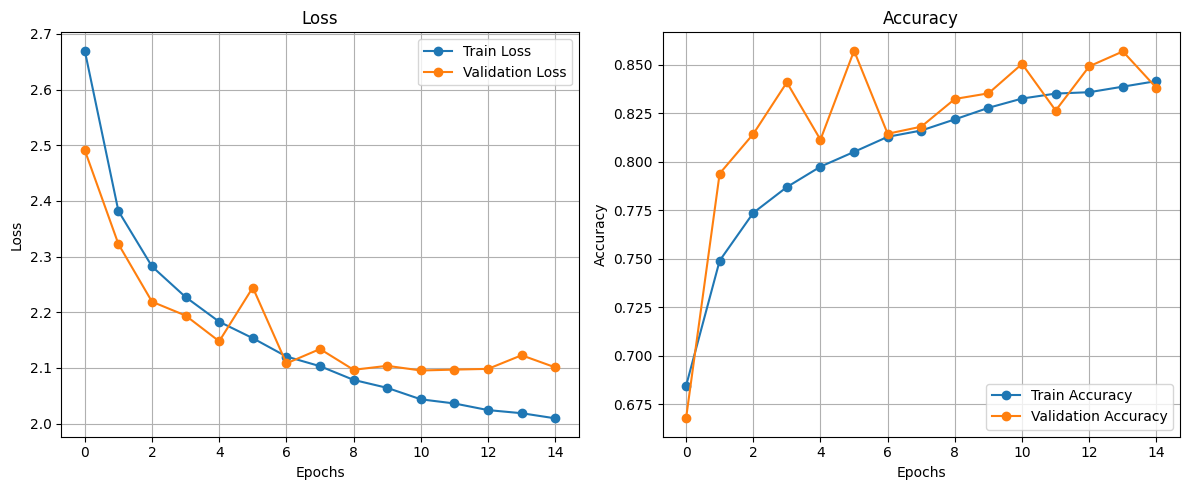

Training complete. Results have been saved.


In [20]:
import os
import time
import json
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from glob import glob
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn.functional as F

# ------------------- CONFIG -------------------
BASE_PATH = "C:/Users/User/Desktop/ai4mars/msl"
TRAIN_SPLIT = os.path.join(BASE_PATH, 'train_split.json')
VAL_SPLIT   = os.path.join(BASE_PATH, 'val_split.json')
CLASS_WEIGHTS_PATH = os.path.join(BASE_PATH, 'class_weights.json')
SAVED_MODEL_DIR    = "C:/Users/User/Desktop/saved_model"
os.makedirs(SAVED_MODEL_DIR, exist_ok=True)

NUM_CLASSES        = 4   # Soil, Bedrock, Sand, Big Rock
BATCH_SIZE         = 16
EPOCHS             = 15
LEARNING_RATE      = 1e-4
L2_REGULARIZATION  = 1e-5
MIN_DELTA          = 1e-5
PATIENCE           = 5

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# ---------------------------------------------

# ----------------- DATA LOADING -------------
def load_splits(split_path):
    with open(split_path, 'r') as f:
        return json.load(f)

train_split = load_splits(TRAIN_SPLIT)
val_split   = load_splits(VAL_SPLIT)

# Load class weights
with open(CLASS_WEIGHTS_PATH, 'r') as f:
    class_weights_json = json.load(f)
class_weights = torch.tensor(class_weights_json["class_weights"], dtype=torch.float32)

class RealMarsDataset(Dataset):
    def __init__(self, data):
        """
        Args:
            data (list[dict]): List of dictionaries with 'image' and 'mask' keys
        """
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Read image and mask paths
        image_path = self.data[idx]['image']
        mask_path  = self.data[idx]['mask']

        # Load and preprocess image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image is None:
            image = np.zeros((256, 256, 3), dtype=np.float32)
        else:
            image = image.astype(np.float32) / 255.0
            image = cv2.resize(image, (256, 256))
        image = torch.from_numpy(image.transpose(2, 0, 1)).float()  # (C,H,W)

        # Load and preprocess mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            mask = np.full((256, 256), fill_value=-1, dtype=np.int64)
        else:
            mask = mask.astype(np.int64)
            mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_NEAREST)

        # Replace 255 with -1 for ignore index
        mask[mask == 255] = -1

        # Create one-hot encoding (not strictly needed if using cross-entropy with ignore_index)
        mask_one_hot = torch.zeros((NUM_CLASSES, mask.shape[0], mask.shape[1]), dtype=torch.float32)
        for c in range(NUM_CLASSES):
            mask_class = (mask == c).astype(np.float32)
            mask_one_hot[c] = torch.from_numpy(mask_class)

        return image, torch.tensor(mask, dtype=torch.long), mask_one_hot

train_dataset = RealMarsDataset(train_split)
val_dataset   = RealMarsDataset(val_split)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

import torch
import torch.nn as nn
import torch.nn.functional as F

############################################
#               Hybrid Loss
############################################

def hybrid_loss(pred, target, target_one_hot, class_weights, ignore_index=-1):
    """
    Weighted Cross-Entropy (WCE) + Dice + Tversky + Focal loss combined.

    pred:          [B, num_classes, H, W] raw logits
    target:        [B, H, W] ground-truth class indices
    target_one_hot:[B, num_classes, H, W]
    class_weights: shape [num_classes]
    ignore_index:  label index to ignore
    """
    # Weighted Cross-Entropy
    valid_target = target.clone()
    valid_target[valid_target == ignore_index] = 0  # map ignore to class 0
    wce_loss = nn.CrossEntropyLoss(weight=class_weights, ignore_index=ignore_index)(pred, valid_target)

    # Softmax
    pred_softmax = torch.softmax(pred, dim=1)

    # Dice Loss
    dice_num = 2 * (pred_softmax * target_one_hot).sum(dim=(2, 3))
    dice_den = (pred_softmax + target_one_hot).sum(dim=(2, 3)) + 1e-6
    dice = 1 - (dice_num / dice_den).mean()

    # Tversky Loss
    alpha, beta = 0.7, 0.3
    true_pos = (pred_softmax * target_one_hot).sum(dim=(2, 3))
    false_neg = (target_one_hot * (1 - pred_softmax)).sum(dim=(2, 3))
    false_pos = ((1 - target_one_hot) * pred_softmax).sum(dim=(2, 3))
    tversky_index = true_pos / (true_pos + alpha * false_neg + beta * false_pos + 1e-6)
    tversky = 1 - tversky_index.mean()

    # Focal Loss
    # (gamma=2.0, alpha param can be folded in if desired)
    focal = -(target_one_hot * ((1 - pred_softmax)**2) * torch.log(pred_softmax + 1e-6)).mean()

    return wce_loss + dice + tversky + focal

import torch
import torch.nn as nn
import torch.nn.functional as F

############################################
#        Factorized Residual Block
############################################
class FactorizedResidualBlock(nn.Module):
    """
    A basic ERFNet-style factorized residual block.
    """
    def __init__(self, in_channels, out_channels, stride=1, dropout=0.0):
        super().__init__()
        self.stride = stride
        self.in_channels = in_channels
        self.out_channels = out_channels

        # Factorized 3×3 as 1×3 then 3×1
        self.conv1x3 = nn.Conv2d(in_channels, out_channels, kernel_size=(1,3),
                                 stride=(1,stride), padding=(0,1), bias=False)
        self.conv3x1 = nn.Conv2d(out_channels, out_channels, kernel_size=(3,1),
                                 stride=(stride,1) if stride>1 else (1,1),
                                 padding=(1,0), bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout2d(dropout) if dropout>0 else nn.Identity()

        # 1×1 projection if shape changes
        self.proj = None
        if (in_channels!=out_channels) or (stride>1):
            self.proj = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1,
                          stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = x
        out = self.conv1x3(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv3x1(out)
        out = self.bn2(out)
        out = self.dropout(out)

        if self.proj is not None:
            identity = self.proj(identity)

        out = out + identity
        out = self.relu(out)
        return out

############################################
#         ERFNet Encoder
############################################
class ERFNetEncoder(nn.Module):
    """
    Retains one skip_early from first downsampling, factorized blocks remain the same.
    """
    def __init__(self, input_channels=3, dropout=0.0):
        super().__init__()
        # Stage1
        self.layer0 = nn.Sequential(
            nn.Conv2d(input_channels, 16, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
        )
        # Stage2
        self.layer1 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
        )

        # Factorized blocks
        self.block1 = FactorizedResidualBlock(64, 64, stride=1, dropout=dropout)
        self.block2 = FactorizedResidualBlock(64, 64, stride=1, dropout=dropout)
        self.block3 = FactorizedResidualBlock(64, 128, stride=2, dropout=dropout)
        self.block4 = FactorizedResidualBlock(128,128, stride=1, dropout=dropout)
        self.block5 = FactorizedResidualBlock(128,128, stride=1, dropout=dropout)

    def forward(self, x):
        # Stage1 => [B,16,H/2,W/2]
        x = self.layer0(x)
        skip_early = x.clone()

        # Stage2 => [B,64,H/4,W/4]
        x = self.layer1(x)

        # Additional blocks => final shape [B,128,H/8,W/8]
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)

        return x, skip_early

###########################################
#       Boundary Refinement Module
###########################################
class BoundaryRefinementModule(nn.Module):
    """
    A small module to refine boundaries in the upsampled segmentation. 
    For example, a 3×3 conv or factorized block that focuses on local adjacency.
    """
    def __init__(self, in_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1, bias=False)
        self.bn1   = nn.BatchNorm2d(in_channels)
        self.conv2 = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1, bias=False)
        self.bn2   = nn.BatchNorm2d(in_channels)

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out, inplace=True)

        out = self.conv2(out)
        out = self.bn2(out)
        out = out + identity
        out = F.relu(out, inplace=True)
        return out

###########################################
#         ERFNet Decoder (Enhanced)
###########################################
class ERFNetDecoder(nn.Module):
    """
    Less channel expansion + optional single boundary refine.
    """
    def __init__(self, dropout=0.0, out_channels=4):
        super().__init__()
        # up1 => [B,128,H/8,W/8] => [B,64,H/4,W/4]
        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.block_up1 = FactorizedResidualBlock(64, 64, stride=1, dropout=dropout)

        # up2 => => [B,64,H/2,W/2]
        self.up2 = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=2, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(64)
        # If you want to skip the extra block here, you can remove it or keep it
        self.block_up2 = FactorizedResidualBlock(64, 64, stride=1, dropout=dropout)

        # Merge skip_early => (16 -> 16), cat => 80 => reduce => 64
        self.skip_conv = nn.Conv2d(16, 16, kernel_size=1, bias=False)
        self.merge_skip = nn.Conv2d(64+16, 64, kernel_size=1, bias=False)
        self.bn_merge = nn.BatchNorm2d(64)

        # boundary refine
        self.bound_refine = BoundaryRefinementModule(in_channels=64)

        # final upsample => => [B,64,H,W], 256×256
        self.up3 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1, bias=False)
        self.bn3 = nn.BatchNorm2d(32)

        self.output_conv = nn.Conv2d(32, out_channels, kernel_size=1)

    def forward(self, x, skip_early):
        # x => [B,128,H/8,W/8]
        # 1) up1 => [B,64,H/4,W/4]
        x = self.up1(x)
        x = self.bn1(x)
        x = F.relu(x, inplace=True)
        x = self.block_up1(x)

        # 2) up2 => => [B,64,H/2,W/2]
        x = self.up2(x)
        x = self.bn2(x)
        x = F.relu(x, inplace=True)
        x = self.block_up2(x)

        # Merge skip
        skip_feat = self.skip_conv(skip_early)   # => [B,16,H/2,W/2]
        x = torch.cat([x, skip_feat], dim=1)     # => [B,80,H/2,W/2]
        x = self.merge_skip(x)                   # => [B,64,H/2,W/2]
        x = self.bn_merge(x)
        x = F.relu(x, inplace=True)

        # Boundary refinement
        x = self.bound_refine(x)

        # 3) final upsample => => [B,32,H,W]
        x = self.up3(x)
        x = self.bn3(x)
        x = F.relu(x, inplace=True)

        # final 1×1
        logits = self.output_conv(x)
        return logits


############################################
#             ERFNet Model
############################################
class ERFNet(nn.Module):
    """
    More minimal enhancements while preserving some skip + boundary refine.
    """
    def __init__(self, num_classes=4, dropout=0.0):
        super().__init__()
        self.encoder = ERFNetEncoder(input_channels=3, dropout=dropout)
        self.decoder = ERFNetDecoder(dropout=dropout, out_channels=num_classes)

    def forward(self, x):
        encoded, skip_early = self.encoder(x)
        logits = self.decoder(encoded, skip_early)
        return logits

# ---------------------------------------------

# ---------------- TRAIN FUNCTION ------------
def train_model(model, train_loader, val_loader, optimizer, scheduler, num_epochs, save_path, early_stopping_patience=5):
    model.to(DEVICE)
    best_val_loss = float('inf')
    early_stopping_counter = 0

    # We'll store training history in these lists so that
    # we don't get the "'function' object is not subscriptable" error.
    history = {
        'loss': [],
        'val_loss': [],
        'accuracy': [],
        'val_accuracy': []
    }

    def mean_iou(pred, target, num_classes):
        """Calculate Mean IoU."""
        pred = torch.argmax(pred, dim=1)
        ious = []
        for cls in range(num_classes):
            intersection = ((pred == cls) & (target == cls)).sum().item()
            union = ((pred == cls) | (target == cls)).sum().item()
            if union > 0:
                ious.append(intersection / union)
        return np.mean(ious) if ious else 0.0

    curr_lr = optimizer.param_groups[0]['lr']  # Keep track of current LR

    for epoch in range(num_epochs):
        # Manually adjust LR every 2 epochs by factor=0.7
        if epoch > 0 and epoch % 2 == 0:
            curr_lr = curr_lr * 0.7
            for param_group in optimizer.param_groups:
                param_group['lr'] = curr_lr
            print(f"Learning Rate decayed to {curr_lr:.6f} at epoch {epoch}")

        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0
        for images, masks, masks_one_hot in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]"):
            images, masks, masks_one_hot = images.to(DEVICE), masks.to(DEVICE), masks_one_hot.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = hybrid_loss(outputs, masks, masks_one_hot, class_weights)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            # Accuracy calculation
            preds = outputs.argmax(dim=1)
            valid_indices = (masks != -1)  # ignore index
            train_correct += (preds[valid_indices] == masks[valid_indices]).sum().item()
            train_total   += valid_indices.sum().item()

        # Compute training metrics
        train_loss /= len(train_loader)
        train_accuracy = train_correct / train_total if train_total > 0 else 0.0

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for images, masks, masks_one_hot in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]"):
                images, masks, masks_one_hot = images.to(DEVICE), masks.to(DEVICE), masks_one_hot.to(DEVICE)
                outputs = model(images)
                loss = hybrid_loss(outputs, masks, masks_one_hot, class_weights)
                val_loss += loss.item()

                # Accuracy calculation
                preds = outputs.argmax(dim=1)
                valid_indices = (masks != -1)
                val_correct += (preds[valid_indices] == masks[valid_indices]).sum().item()
                val_total   += valid_indices.sum().item()

        val_loss      /= len(val_loader)
        val_accuracy  = val_correct / val_total if val_total > 0 else 0.0

        # Step the ReduceLROnPlateau with the validation loss
        scheduler.step(val_loss)

        print(f"[Epoch {epoch+1}/{num_epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, LR: {curr_lr:.6f}")

        # Save metrics to history
        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['accuracy'].append(train_accuracy)
        history['val_accuracy'].append(val_accuracy)

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0
            torch.save(model.state_dict(), save_path)
            print(f"Model saved to {save_path}")
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= early_stopping_patience:
                print("Early stopping triggered. No improvement in validation loss.")
                break

    return history

# ---------------- PLOT LEARNING CURVES --------------
def plot_learning_curves(history):
    """Plot training and validation loss, accuracy using the stored `history` dict."""
    plt.figure(figsize=(12, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label="Train Loss", marker='o')
    plt.plot(history['val_loss'], label="Validation Loss", marker='o')
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label="Train Accuracy", marker='o')
    plt.plot(history['val_accuracy'], label="Validation Accuracy", marker='o')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# ---------------- MAIN SCRIPT ----------------
if __name__ == "__main__":
    model = ERFNet(num_classes=NUM_CLASSES)
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=L2_REGULARIZATION)

    # Setup ReduceLROnPlateau
    reduce_on_plateau = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, min_lr=1e-10, verbose=1)

    # Train
    history = train_model(
        model,
        train_loader,
        val_loader,
        optimizer,
        reduce_on_plateau,
        num_epochs=EPOCHS,
        save_path=os.path.join(SAVED_MODEL_DIR, 'ERFNet.pth'),
        early_stopping_patience=PATIENCE
    )

    # Plot the final learning curves
    plot_learning_curves(history)

    print("Training complete. Results have been saved.")

Model evaluation

Classification Report:
              precision    recall  f1-score   support

        Soil     0.8210    0.8946    0.8563  32495798
     Bedrock     0.9220    0.8380    0.8780  43578871
        Sand     0.8624    0.7969    0.8284  10873451
    Big Rock     0.1889    0.6560    0.2933    761427

    accuracy                         0.8523  87709547
   macro avg     0.6986    0.7964    0.7140  87709547
weighted avg     0.8708    0.8523    0.8587  87709547



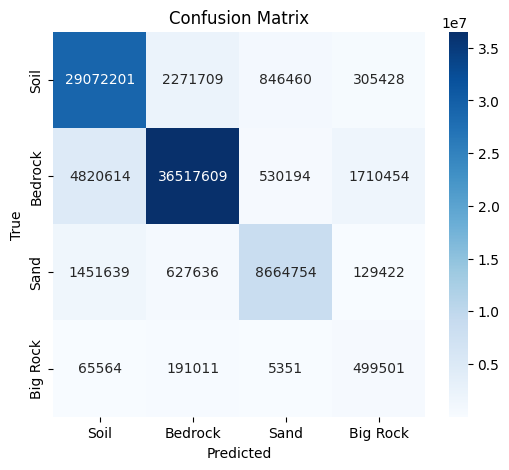

Per-Class IoU:
  Soil: 0.7486
  Bedrock: 0.7825
  Sand: 0.7070
  Big Rock: 0.1718
Mean IoU: 0.6025


In [21]:
import torch
import numpy as np
import cv2
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your test split and define a DataLoader similar to how you do it for train/val
#    (Assuming you have test_split.json or something similar).
test_split_path = os.path.join(BASE_PATH, "test_split.json")

# Example RealMarsDataset usage for the test set (reusing the same class from your code)
test_split_data = load_splits(test_split_path)
test_dataset = RealMarsDataset(test_split_data)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# 2. Load the trained model and set it to eval mode
model = ERFNet(num_classes=NUM_CLASSES)
model_path = os.path.join(SAVED_MODEL_DIR, 'ERFNet.pth')
model.load_state_dict(torch.load(model_path))
model.to(DEVICE)
model.eval()

# 3. Inference on the test set and gather predictions and targets
all_preds = []
all_targets = []

with torch.no_grad():
    for images, masks, _ in test_loader:  # We don't necessarily need masks_one_hot for evaluation
        images = images.to(DEVICE)
        masks  = masks.to(DEVICE)

        outputs = model(images)
        preds = outputs.argmax(dim=1)  # shape: (batch_size, H, W)

        # Move to CPU
        preds_np  = preds.cpu().numpy()
        masks_np  = masks.cpu().numpy()

        # Flatten them, but exclude the -1 ignore pixels
        for i in range(preds_np.shape[0]):
            valid_indices = (masks_np[i] != -1)  # mask is -1 => ignore
            valid_preds   = preds_np[i][valid_indices]
            valid_targets = masks_np[i][valid_indices]
            all_preds.extend(valid_preds.tolist())
            all_targets.extend(valid_targets.tolist())

# 4. Classification report (multi-class)
#    We specify the class indices and their names for interpretability:
class_names = ["Soil", "Bedrock", "Sand", "Big Rock"]
report = classification_report(
    all_targets,
    all_preds,
    labels=[0, 1, 2, 3],
    target_names=class_names,
    digits=4
)
print("Classification Report:")
print(report)

# 5. Confusion matrix
cm = confusion_matrix(all_targets, all_preds, labels=[0, 1, 2, 3])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 6. Compute class-wise and mean IoU
#    We can adapt the mean_iou approach to aggregated data here
def compute_iou(preds, targets, num_classes):
    """
    preds: list or 1D array of predicted class indices
    targets: list or 1D array of ground truth class indices
    Returns: array of IoU values for each class, plus mean IoU
    """
    ious = []
    for cls in range(num_classes):
        intersection = 0
        union = 0
        for p, t in zip(preds, targets):
            intersection += int(p == cls and t == cls)
            union        += int((p == cls) or (t == cls))
        if union == 0:
            ious.append(float('nan'))
        else:
            ious.append(intersection / union)
    return ious

ious = compute_iou(all_preds, all_targets, NUM_CLASSES)
print("Per-Class IoU:")
for idx, iou_val in enumerate(ious):
    print(f"  {class_names[idx]}: {iou_val:.4f}")
mean_iou = np.nanmean(ious)
print(f"Mean IoU: {mean_iou:.4f}")

Segmentation map prediction

Selected Image: C:/Users/User/Desktop/ai4mars/msl\images\edr\NLB_480067841EDR_F0450852NCAM00309M1.JPG
Ground Truth Label: C:/Users/User/Desktop/ai4mars/msl\labels\train\NLB_480067841EDR_F0450852NCAM00309M1.png


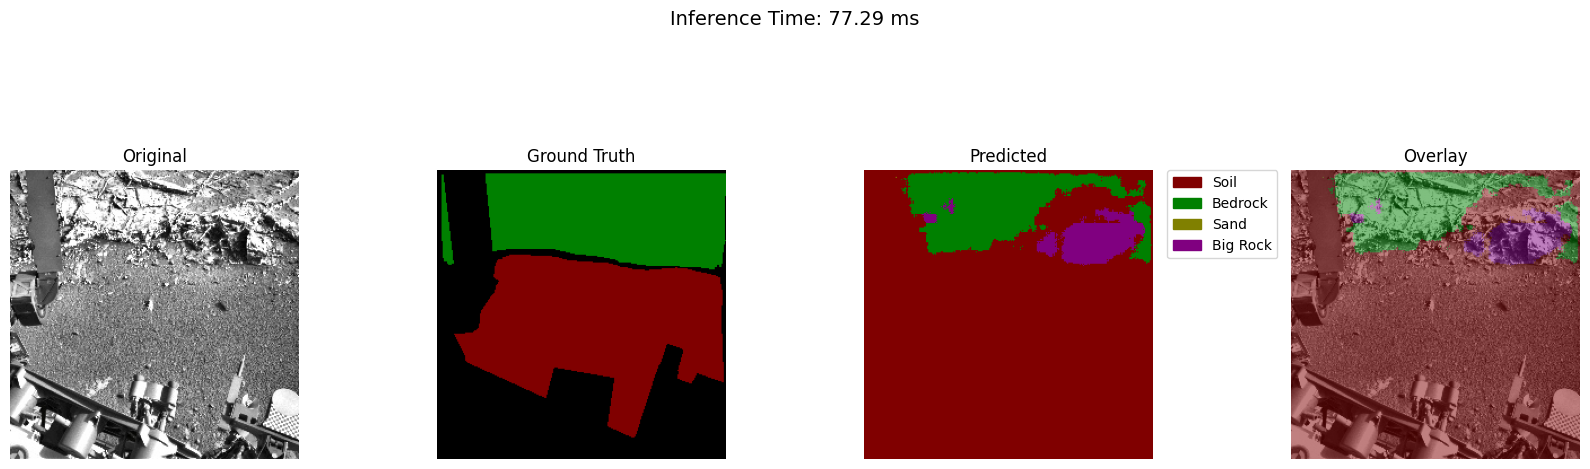

In [22]:
import os
import json
import time
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


BASE_PATH       = "C:/Users/User/Desktop/ai4mars/msl"
TEST_SPLIT      = os.path.join(BASE_PATH, "test_split.json")
SAVED_MODEL_DIR = "C:/Users/User/Desktop/saved_model"
MODEL_PATH      = os.path.join(SAVED_MODEL_DIR, "ERFNet.pth")

NUM_CLASSES     = 4
DEVICE          = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class_names = ["Soil", "Bedrock", "Sand", "Big Rock"]

# Consistent BGR color map for display
color_map = {
    0: (0, 0, 128),    # Soil
    1: (0, 128, 0),    # Bedrock
    2: (0, 128, 128),  # Sand
    3: (128, 0, 128),  # Big Rock
}

def load_test_split(test_split_path):
    with open(test_split_path, 'r') as f:
        return json.load(f)

def load_preprocess_single_image(img_path):
    """Load an image, resize to 256x256, normalize [0..1], and convert to Tensor(C,H,W)."""
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    if image is None:
        image = np.zeros((256, 256, 3), dtype=np.float32)
    else:
        image = image.astype(np.float32) / 255.0
        image = cv2.resize(image, (256, 256))
    image_tensor = torch.from_numpy(image.transpose(2, 0, 1)).float()
    return image_tensor

def load_ground_truth_mask(mask_path):
    """Load ground-truth mask, resize, and return as (H,W) integer array."""
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        mask = np.full((256, 256), fill_value=-1, dtype=np.int64)
    else:
        mask = mask.astype(np.int64)
        mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_NEAREST)
    return mask

def colorize_mask(mask):
    """
    Convert class indices in 'mask' to a BGR color image using 'color_map'.
    mask shape: (H, W), integer class IDs.
    Returns: (H,W,3) colored image.
    """
    h, w = mask.shape
    seg_vis = np.zeros((h, w, 3), dtype=np.uint8)
    for cls_idx, bgr in color_map.items():
        seg_vis[mask == cls_idx] = bgr
    return seg_vis

def main():
    # 1. Load test split
    test_data = load_test_split(TEST_SPLIT)
    if not test_data:
        raise ValueError("Test split is empty or missing.")

    # 2. Select an image from the test split
    image_id = 541
    if image_id < 0 or image_id >= len(test_data):
        raise ValueError(f"Invalid image_id: {image_id}, must be between 0 and {len(test_data)-1}.")

    sample = test_data[image_id]
    image_path = sample["image"]
    mask_path  = sample["mask"]  # Ground-truth label path

    print(f"Selected Image: {image_path}")
    print(f"Ground Truth Label: {mask_path}")

    # 3. Load the trained ERFNet model
    model = ERFNet(num_classes=NUM_CLASSES)
    model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
    model.to(DEVICE)
    model.eval()

    # 4. Preprocess the single image
    image_tensor = load_preprocess_single_image(image_path).unsqueeze(0).to(DEVICE)

    # Load original BGR image for display
    original_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if original_bgr is None:
        original_bgr = np.zeros((256, 256, 3), dtype=np.uint8)
    else:
        original_bgr = cv2.resize(original_bgr, (256, 256))

    # Load ground truth mask
    gt_mask = load_ground_truth_mask(mask_path)  # shape [256,256], class IDs
    gt_color = colorize_mask(gt_mask)

    # 5. Inference and measure time
    start_time = time.time()
    with torch.no_grad():
        output = model(image_tensor)  # shape [1, num_classes, 256,256]
    end_time = time.time()
    inference_time_ms = (end_time - start_time) * 1000

    # 6. Convert to predicted mask
    pred_mask = output.argmax(dim=1).squeeze(0).cpu().numpy()
    pred_color = colorize_mask(pred_mask)

    # 7. Visualization
    # For clarity, we display 4 subplots: (1) original, (2) ground-truth, (3) predicted, (4) overlay
    original_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)
    gt_rgb       = cv2.cvtColor(gt_color, cv2.COLOR_BGR2RGB)
    pred_rgb     = cv2.cvtColor(pred_color, cv2.COLOR_BGR2RGB)

    # Overlay: blend original and predicted
    overlay_bgr = cv2.addWeighted(original_bgr, 0.5, pred_color, 0.5, 0)
    overlay_rgb = cv2.cvtColor(overlay_bgr, cv2.COLOR_BGR2RGB)

    # Build legend patches
    patches = []
    for i, name in enumerate(class_names):
        b, g, r = color_map[i]
        color_rgb = (r/255, g/255, b/255)
        patches.append(mpatches.Patch(color=color_rgb, label=name))

    plt.figure(figsize=(16, 6))

    # Subplot 1: Original
    plt.subplot(1, 4, 1)
    plt.imshow(original_rgb)
    plt.title("Original")
    plt.axis('off')

    # Subplot 2: Ground Truth
    plt.subplot(1, 4, 2)
    plt.imshow(gt_rgb)
    plt.title("Ground Truth")
    plt.axis('off')

    # Subplot 3: Predicted
    plt.subplot(1, 4, 3)
    plt.imshow(pred_rgb)
    plt.title("Predicted")
    plt.axis('off')
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    # Subplot 4: Overlay
    plt.subplot(1, 4, 4)
    plt.imshow(overlay_rgb)
    plt.title("Overlay")
    plt.axis('off')

    plt.suptitle(f"Inference Time: {inference_time_ms:.2f} ms", fontsize=14)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()